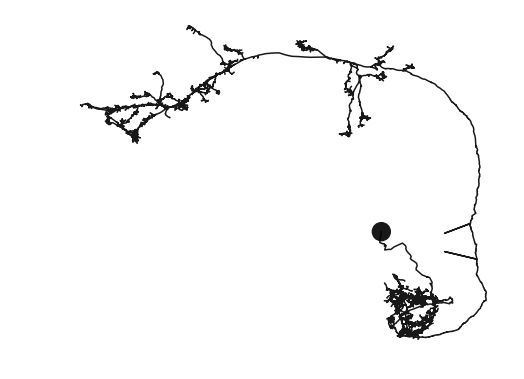

In [1]:
import pymaid
import matplotlib.pyplot as plt

rm = pymaid.CatmaidInstance('server_url','http_user','http_pw','token')

n = pymaid.get_neurons(16)

fig, ax = n.plot2d(connectors=False, linewidth=1.5)
plt.show()

In [2]:
# Resample to 10um
resampled = pymaid.resample_neuron(n, 10000)

# Downsample by factor 10
downsampled = pymaid.downsample_neuron(n, 10)

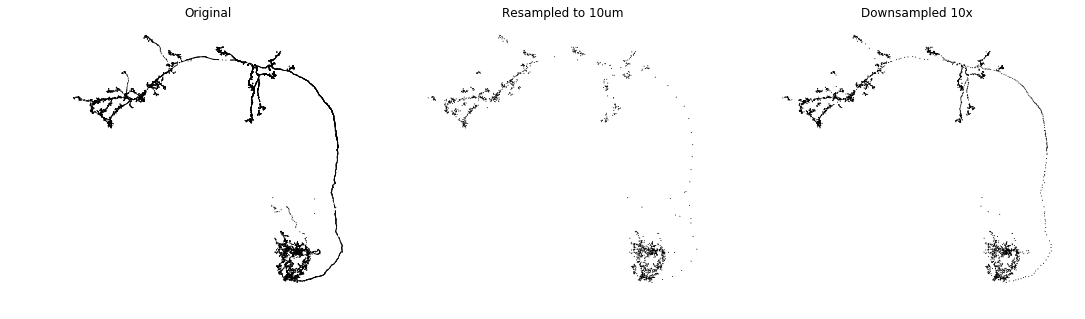

In [3]:
fig, axes = plt.subplots(1, 3, figsize=(18,5))

_ = pymaid.plot2d(n.nodes[['x', 'y', 'z']].values,
                  ax=axes[0])

_ = pymaid.plot2d(resampled.nodes[['x', 'y', 'z']].values,
                  ax=axes[1])

_ = pymaid.plot2d(downsampled.nodes[['x', 'y', 'z']].values,
                  ax=axes[2])

for ax, title in zip(axes, ['Original', 'Resampled to 10um', 'Downsampled 10x']):
    ax.set_title(title)
    ax.set_axis_off()

plt.show()

In [4]:
import pandas as pd

tn_id_comparison = pd.concat([n.nodes[['treenode_id']], resampled.nodes[['treenode_id']]], axis=1)
tn_id_comparison.columns = ['original IDs', 'after resampling']

tn_id_comparison.head()

,original IDs,after resampling
0,126378,126378.0
1,10344019,3194824.0
2,30307659,10341970.0
3,10343690,125420.0
4,30018122,10370725.0
